In [5]:
# For Jupyter Notebook
%pip install emoji swifter Sastrawi pipreqs nltk wordcloud

Note: you may need to restart the kernel to use updated packages.


# **Import Library**

In [6]:
import pandas as pd
import re
import string
import emoji
import swifter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Download resource NLTK (jika belum)
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')

# Inisialisasi Sastrawi Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Load dataset hasil scraping
file_path = "Dataset\youtube_comments.csv"
df = pd.read_csv(file_path)

# Stopwords bahasa Indonesia
stop_words = set(stopwords.words("indonesian"))

<>:25: SyntaxWarning: invalid escape sequence '\y'
<>:25: SyntaxWarning: invalid escape sequence '\y'
C:\Users\Hubbal Habbaza\AppData\Local\Temp\ipykernel_27184\1022694198.py:25: SyntaxWarning: invalid escape sequence '\y'
  file_path = "Dataset\youtube_comments.csv"
[nltk_data] Downloading package stopwords to C:\Users\Hubbal
[nltk_data]     Habbaza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Hubbal
[nltk_data]     Habbaza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Hubbal
[nltk_data]     Habbaza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# **Preprocessing**

In [7]:
custom_stopwords = {
    "br", "href", "amp", "quot", "com", "watch", "https", "www", "ygcodv_xrue",
    "om", "bang", "loh", "mah", "koh", "wkwk", "gw", "gk", "gue", "lu", "gua",
    "udh", "jd", "tuh", "dah", "gini", "gitu", "aja", "sih", "lah", "t", "d",
    "ni", "tu", "sm", "tp", "trus", "udah", "&quot;", "&amp;", "&gt;", "&lt;"
}

word_replacement = {
    "yg": "yang",
    "gak": "tidak", "gk": "tidak", "ga": "tidak",
    "aja": "saja", "kalo": "kalau", "klo": "kalau",
    "biar": "supaya", "karna": "karena", "tapi": "tetapi",
    "sampe": "sampai", "gimana": "bagaimana", "pake": "pakai",
    "bgt": "banget", "lo": "kamu", "nih": "ini", "cuman": "hanya",
    "cuma": "hanya", "udah": "sudah", "nggak": "tidak",
    "dr": "dari", "jd": "jadi", "trus": "terus",
    "kayak": "seperti", "kaya": "seperti", "bakal": "akan",
    "mau": "ingin", "dpt": "dapat", "jgn": "jangan",
    "tdk": "tidak", "liat": "lihat", "pengen": "ingin"
}

# Fungsi untuk membersihkan teks
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Konversi ke huruf kecil
        text = re.sub(r"http\S+|www\S+", "", text)  # Hapus link
        text = re.sub(r"&\w+;", "", text)  # Hapus karakter HTML
        text = re.sub(r"<.*?>", "", text)  # Hapus tag HTML
        text = re.sub(r"[^\w\s]", "", text)  # Hapus tanda baca
        text = re.sub(r"\s+", " ", text).strip()  # Hapus spasi berlebih
        text = re.sub(r"\d+", "", text)  # Hapus angka
        text = re.sub(r"([!?.])\1+", r"\1", text)  # Hapus tanda baca berulang

        # Hapus emoji
        text = emoji.replace_emoji(text, replace="")

        # Tokenisasi
        words = word_tokenize(text)

        # Stopword removal (termasuk custom stopwords)
        words = [word for word in words if word not in stop_words and word not in custom_stopwords]

        # Ganti kata-kata tertentu
        words = [word_replacement.get(word, word) for word in words]

        # Stemming menggunakan Sastrawi
        words = [stemmer.stem(word) for word in words]

        return " ".join(words)
    return ""

In [ ]:
# Terapkan preprocessing ke dataset
df["Cleaned_Comment"] = df["Comment"].swifter.apply(clean_text)

Pandas Apply:   0%|          | 0/12000 [00:00<?, ?it/s]

# **Data Labeling**

In [ ]:
# Kamus Sentimen
kamus_positif = set([
    "kalem", "like", "goodjob", "okey", "terbaik", "kasih yang terbaik", "belajar",
    "serius", "expert", "tak ada yang salah", "kelebihan", "muslim", "menyala", "terbiasa",
    "terbiasa masak bnyk", "didasari", "berbagi", "lebih penting", "aman", "kerja", "percaya",
    "the best", "lebih percaya", "keren", "kebaikan", "di undang", "logika", "ikhlas",
    "senang", "antusias", "tuhan", "makin nunduk", "santay", "klarifikasi", "atensi", "eksposur",
    "setuju", "niat", "sadakoh", "alhamdulilah", "fakta", "dikenal masyarakat", "tulus", "laris manis",
    "cuan", "memuaskan", "suka", "sukses", "sehat selalu", "aammiin", "sabar", "salutttt", "nasehatin",
    "kemenangan", "tumbuh subur", "keuntungan", "kreatif", "pake hati", "baik", "bersih", "iklas",
    "dewasa", "bersatu", "bersama", "lebih baik", "saling support", "cepat sembuh", "respect",
    "respeck", "menyukai", "fokus", "bijaksana", "semangat", "memberi", "puasa", "intropeksi diri",
    "terkenal", "mengakui salah", "evaluasi", "koleb", "ajak collab", "promo", "sehat", "lindungan",
    "epic moment", "paham", "cukup gede", "sangat setuju", "gass teros", "bener", "god bless"
    "kesuksesan", "masjid", "mualaf", "pendukung", "etika", "cerdas", "sayang", "luar biasa",
    "bagi", "seru", "percaya", "barokah", "nama baik", "bijak", "terinspirasi", "relevant", "perbuatan baik",
    "amalan", "sedekah", "amal", "positif", "empati", "kebersamaan", "pengorbanan", "sopan",
    "jujur", "apa adanya", "prestasi", "masyaallah", "perbaiki", "luar biasa", "pembelajaran",
    "ramadhan", "paling cocok", "berani bertanggung jawab", "dukung", "pro", "bangga", "hikmah",
    "terima kasih", "inspirasi", "minta maaf", "perjuangan rakyat", "hebat", "top", "tampan dan pemberani",
    "nasehat", "bagus", "penting", "niat baik", "menang", "penuh persiapan", "motivasi", "rispek",
    "bravo", "kebersamaan", "selalu nonton", "tertib", "teknologi masa depan", "bagus", "mantap",
    "aman", "sehat", "mendidik", "like", "love", "cinta", "penyemangat", "thanks", "keep strong",
    "bermanfaat", "karena allah", "berkah", "bepikir jernih", "berguna", "terharu", "demi indonesia",
    "kagum", "maju terus", "santai", "tertib", "membantu orang", "banyak pengalaman", "naik derajat",
    "no setting", "clear", "professional", "sangat mulia", "tetap di hati", "ttp dihati", "masya allah",
    "semakin dewasa", "lebih baik", "terus berkembang", "pribadi yang lebih baik", "damai", "akur",
    "kota paling cantik", "trending", "orang cerdas", "berkah rezeki", "mewakilkan isi hati", "keren",
    "sangat menghargai", "vibes bagus", "saling melengkapi", "punya idealisme", "dilestarikan", "bangga",
    "perbaiki kesalahan", "persiapan yang matang", "pengamanan yang tepat", "baik banget", "sopan",
    "luar biasa", "panutan", "jadikan pelajaran", "pasti punya kesalahan", "sangat bijak dan dewasa",
    "hatinya tulus", "tetap semangat", "menikmati obrolan", "mau berteman", "sopan santun itu penting",
    "dukung", "orang baik", "menjaga lisan", "smngt ko", "sehat selalu", "selamat beraktifitas", "suka konten bobon",
    "kelasss", "wajar manusia bukan nabi", "cm allah yang tau", "luar biasa", "sesama muslim jangan saling suuzon",
    "baik hati", "mau mengakui kekurangan", "hebat bisa nahan emosi", "pemerintah harus tegas", "king", "anjayy",
    "masuk akal", "setia", "panutan", "idola"
])

kamus_negatif = set([
    "salah", "kebanyakan", "gagal", "mempermalukan", "setingan", "unfollow", "ngebully",
    "anak kecil", "gak tertarik", "tidak tertarik", "gak pernah", "tidak pernah", "nangis",
    "gak tertarik", "tidak tertarik", "tau diri", "gak bisa", "rempong", "takut", "gak jadi",
    "tidak jadi", "berbeda", "gemeteran",  "kekurangan", "gregrtan", "memalukan",
    "enggak kompak", "parah", "tidak mungkin", "kecolongan", "kesengajaan", "settingan",
    "ngalihin", "tak pernah menyangka", "duit", "siapa", "miskin", "ngemis", "habis",
    "drama", "dampak buruknya", "masalah besar", "di remehin", "mumet", "masalah", "merugikan",
    "mepet", "protes", "cepat habis", "gag suka", "menyenggol", "makin tinggi", "di tegor",
    "capek", "ngeri", "lalai", "muluk", "olok", "sengaja", "gk dateng", "kebelet", "bingung",
    "mubeng", "manipulatif", "nyontek", "nyaingin", "ala kadar", "dibantah", "pengen viral",
    "pengen dikenal masyarakat", "pengen nambah followers", "nama baik hancur", "tragedi", "hilang",
    "menghujat", "biar heboh", "viral", "plin plan", "koruptor", "bohong", "demi fyp", "rakus",
    "gak jelas", "fake", "bekcigan", "maling", "cape", "rakoss", "persaingan", "slah", "baper",
    "heran", "sempit", "labil", "dikasi panggung", "bertele tele", "boong", "tidak akan menerima",
    "byon combat", "baper", "ludes", "cancel culture", "pembodohan", "pembohongan", "jijiq",
    "muter2", "aneh", "blunder", "rasis", "perpecahan", "balasan", "ga kreatif", "banyak omong",
    "demi konten", "banyak drama", "isu ruu", "menghakimi", "hujatan", "gemes", "bocah ingusan",
    "ngantuk", "buzzer", "pengecut", "hina", "banyak alasan", "nggak nyambung", "trouble", "putus",
    "bangorrr", "tidak masuk akal", "malas-malasan", "pulang", "cancel", "tidak sesuai ekspektasi",
    "menjatuhkan", "menyalahkan", "kurang", "rasisme", "menghina", "masalah besar", "demi follower"
    "anti", "gk ada adab", "meresahkan", "cecunguk", "arogan", "seenak jidat", "kurang seru",
    "menyudutkan", "menjudge", "ga suka", "ngeganjel", "ngoceh", "kebanyakan yeping", "ceroboh",
    "niat jahat", "racun", "sakit", "keracunan", "kontradiksi", "bangsad", "jijik", "geli", "cringe",
    "ngatain", "cupu", "pengalihan isu", "kesusahan", "busuk", "selingkuh", "dugem", "penjarakan",
    "kangampang", "minum amer", "iri", "ngelantur", "gak ada gunanya", "impostor", "rugi",
    "nglantur", "tipu", "ngasal", "kont", "ngawur", "bosan", "ga berani", "basa basi", "hama",
    "meyudutkan", "anj", "sebel", "yapping", "ga nyambung", "pembohong", "terluka", "kesalahan",
    "kegaduhan", "oknum", "suudzon", "ngaco", "mabok", "sombong", "angkuh", "congkak", "pamer",
    "boikot", "merusak", "bocil", "sdm rendah", "negatif", "blokir", "bocah ingusan", "rekayasa",
    "hukum", "bikin malu", "provokatif", "asal asalan", "kurang baik", "salah paham", "kasihan",
    "kebanyakan", "belibet", "keceplosan", "susah", "kesel", "numpang trend", "dosa", "gasuka",
    "bacot", "bangsat", "geer", "kecewa", "ilang", "penipu", "berlibet", "ngeles", "mbulet",
    "terpaksa", "menghina harga diri", "melukai", "mencederai", "gimmick", "plagiat", "tanpa izin",
    "ngarang", "menjelekkan", "nyinyir", "tercuci otaknya", "kesal", "mengotori tangan", "rendah",
    "iri dengki", "ngeselin", "gawat", "ketar ketir", "take down", "emosi", "pusing", "gasuka",
    "tidak efisien", "mengantemi", "ragu", "nipu", "kocak", "biadab", "tidak sabar", "kehabisan ide konten",
    "kagak nyambung", "showoff", "menggiring opini", "pencurian", "jorok", "pesing", "bauk", "buruk",
    "kocak", "serang", "ribet", "buang", "kurang dihargai", "pencemaran", "kurang mengenakkan",
    "gak mendidik", "blacklist", "bising", "anak mami", "ghibah", "nyari cuan", "jelek", "tidak pernah nonton",
    "miris", "hujat", "senggelke mawon", "merendahkan", "dongo", "kentot", "ngasal", "berbahaya",
    "saling tuduh", "mementingkan rating", "mampus", "ego tinggi", "kampret", "ngaler ngidul", "norak",
    "benci", "serang", "geger", "tengil", "gendok", "rusuh", "berantakan", "menyinggung", "self defence",
    "sampah", "nyerang", "report", "ga drama ga makan", "goblok", "cari muka", "cari sensasi",
    "jangan tonton", "kebelet viral", "adu domba", "boti", "ilfeel", "problematik", "nantang",
    "gampar aja", "bedebah", "mual", "mental issue", "kampang", "flexing", "menyesatkan", "penyepong",
    "keras kepala", "zolim", "mengutamakan gengsi", "bikin emosi", "keuntungan pribadi", "bunuh diri",
    "hancur karir", "manas manasin", "percuma", "pickme", "ruwed", "munafik", "gemeter", "pansos",
    "meremehkan", "unsubscribe", "unsub", "lebay", "kabur", "bajingan", "pengen ludahin", "songong",
    "najis", "bikin eneg", "bodoh", "banci", "jarang gaul", "gak punya rasa simpati dan empati",
    "reputasi hancur", "bete bgt", "bego", "isinya setingan", "ngarang bohong", "tukang drama",
    "dusta", "halalkan segala cara", "tidak mengedukasi", "rusak citra", "tidak suka", "konten tidak berkualitas",
    "cuma bisa giveaway", "bagi-bagi duit", "tidak pernah suka", "konthol", "nonjok", "berbelit-belit",
    "ga terima", "meraso tersinggung", "pling gak suka", "tidak mengedukasi", "jdi jiji", "kalah saing",
    "amatir", "terlalu mendramatisir", "ngadu domba", "ngotot", "ngga jelas", "pencuri", "membodohi",
    "menimbulkan kekacauan", "menyakiti hati", "gugup", "kebanyakan bacot", "masuk penjara", "tai", "ga nyambung",
    "jengkel", "mental pengemis", "seting", "konten sampah", "hancur", "belum dewasa", "gimik", "skip",
    "hujatan", "pick me", "gak suka", "nyinggung daerah", "tidak sesuai realita", "paling jijik",
    "males", "ngomong berbelit", "orang pendendam", "tidak suka disaingin", "ga punya ide", "tolong penjarakan",
    "tidak berani", "alasan pengen iphone", "kelalaian", "orang dongok", "gak paham lagi", "haus validasi",
    "boycot", "ga bermutu", "dongo", "muak banget", "gaada etika", "ga nyambung", "ketauan bohong", "tidak bagus",
    "gak beres", "wili salmon", "mengantuk", "kesannya pamer", "suka membuat konten setingan", "maksa banget",
    "menghalalkan segala cara", "ditanya kemana jawab kemana", "banyak ngelak", "pansos doang", "naik darah",
    "merasa disaingi", "jdi banci", "patut dikasih pelajaran", "kocak lu", "menebar kebencian",
    "ta1 ledig", "tidak mau disalahkan", "penjelasan muter kayak kipas angin", "fix buzzer", "muak banget",
    "suara ketakutan", "bkr rumh ny lh", "gaptek", "ga mengantri", "fix setingan", "agak lain", "makulak",
    "gabakalan mau nonton", "tak becus", "unfol", "bikin sensasi sampah", "viral karena kejelekan",
    "susah minta maaf", "takut dateng", "kurang pengalaman", "orang linglung", "seorang penipu", "gak berfaedah",
    "sampe muak", "bocil bengik", "giring ayam masuk kandang", "ngomongnya kaya tugu pancoran", "kaya codeblue",
    "kebanyakan ngomong", "boongnya ketara banget", "omong kosong", "pemiikiran bocah", "parah",
    "pembelaan doang", "asu", "hilih kintil", "bosan", "hidup penuh drama", "adab kek ngejek", "bocah ingusan",
    "lol", "kebawa kesel", "gak tulus", "kyk baca dongeng", "hanya untuk dirinya sendiri", "banyak bhong", "bocah ngibul",
    "ngelus dada", "dedi kokbuzzer", "karangan", "bukan sesuai fakta", "harta dan pikiran ga seimbang",
    "jangan konten masak", "ngajawab ka kaler ka kidul", "caper", "playing victim", "dontol", "gak nyambung",
    "pemikiran bocah", "heran sama pngikut", "rasis bawa suku", "menyudutkan", "syirik sok paling bener",
    "dilanda kelaparan", "kuntullll", "ga sesuai konteks", "kurang priper", "mulai redup", "rakus", "miskin",
    "apalah", "banyak kasus", "suka curi makanan", "biasa ngibul", "mental pengemis", "gemetar", "takut dilaporin",
    "saling sikut", "ga kreatif", "rasa ingin mukul", "pencemaran nama baik", "tidak pernah nonton", "tidak aman",
    "sombong", "musuhan", "pantek", "halu", "ketakutan banget", "mementingkan viral", "merugikan palembang",
    "jijik gua", "demi viral", "demi fyp", "tidak bijak", "muter beut", "anjj", "konten palsu", "belum dewasa",
    "nggak bermutu", "lari dari tanggung jawab", "cupu", "raja settingan", "lawak lo", "letoy", "diboongin anak kecil",
    "ga masuk akal", "sakit ni otaknya", "mbulet", "kecewa", "odgj masuk kuali", "pembohong publik", "cina licik",
    "aya lieran", "asal buat konten", "indonesia gelap", "makin tengil dan songong", "cuman cari views", "dzolim",
    "memanfaatkan orang lain", "alasan anak sd", "bullshit", "di luar konteks", "boring banget", "el klarifikasi",
    "jawaban gak nyambung", "podcast sampah", "project gagal", "males denger", "eneg banget", "lawak",
    "anak mami", "mencoreng nama baik", "bocah fomo", "cangkeme mencla mencle", "cerita mbulet", "palembang tidak terima",
    "orang makruk", "merusak dan memecah bangsa", "freak lo", "aneh masih banyak belain", "konten pembodohan",
    "masih denial", "bullshit", "ngelak", "kon", "fake", "orang dongo", "taik", "dajjal", "ngamuk", "otak udang",
    "anak mami", "bocil"
])

In [ ]:
def classify_text(text):
    text = text.lower()

    # Cek kata negatif
    for word in kamus_negatif:
        if re.search(r'\b' + re.escape(word) + r'\b', text):
            return "negatif"

    # Cek kata positif
    for word in kamus_positif:
        if re.search(r'\b' + re.escape(word) + r'\b', text):
            return "positif"

    return "netral"

In [ ]:
# Terapkan fungsi sentimen
df["sentiment"] = df["Cleaned_Comment"].apply(classify_text)

In [ ]:
# Hitung distribusi kelas sentimen
sentiment_counts = df["sentiment"].value_counts()

# Tampilkan hasil
print(sentiment_counts)

sentiment
negatif    4277
netral     4256
positif    1467
Name: count, dtype: int64


In [ ]:
# Ambil contoh komentar Positif setelah perbaikan
neutral_comments = df[df["sentiment"] == "positif"]["Cleaned_Comment"].head(5)
print(neutral_comments.to_list())

['tumben kalem', 'goodjob bobon', 'wili kasih yang baik', 'bobon kalau ngonten dasar bagi yang pentingdari pd ting ws', 'tim yang percaya bobon']


In [ ]:
# Ambil contoh komentar Negatif setelah perbaikan
neutral_comments = df[df["sentiment"] == "negatif"]["Cleaned_Comment"].head(50)
print(neutral_comments.to_list())

['yang tidak suka wili like', 'inti willie tetep salah orang nya banyak excuse jelasin kalau tau gagal kontenin closing nada sifat nya malu', 'unfollow wilie salim dari lee', 'seperti omom ngebully anak ya', 'nama ws tidak tarik tidak nonton konten podcast ded yang nang tidak tarik serius ingin bikin konten masak tidak ajar ingin besok langsung jalan kalau tau tidak masak ajak expert nyague mak emak kalau acara arisan milih sen rempong masak orang takut gagal tidak makan masak hari porsi beda bos', 'a tau ngibul kencing mobil gemeteran', 'nonton bobon santoso masakanya aneh aneh lepas minum', 'nya okeytak yang salahsalah keadaansemua org kurang lebih nya', 'ko gregrtan ya s willi', 'bobon malu cina kompak muslim parah', 'klau keamananya kcolongan kak willy shalim sangking unsur sengaja', 'inti settingan konten', 'pas tau brp lma masak rendang mlh ngalihin omong msak mudah dari segi timing dn prsiapan knp kalau org nikah tim rewang tukang masak nya yang biasa masak bnyk', 'sangka jadi p

In [ ]:
# Ambil contoh komentar Netral setelah perbaikan
neutral_comments = df[df["sentiment"] == "netral"]["Cleaned_Comment"].head(50)
print(neutral_comments.to_list())

['opo ae willi iku wes wes ajar broo', 'emang konten willie salim tidak ting', 'wili wili', 'nyala bobon', 'ngomong willy yang orangy', 'tipe orang yang nyebut pakai nama orangnyaa', 'yang motong nyiang sapi nyaa will', 'liat bobon kurus dikit rocky gerung tinggal pakai kho ngmong', '', 'willie salim', 'hadier', 'waaah tuju', 'bobon masak bareng tuju engga', 'ya', 'npd wili', 'org non palembang fyp konten ws', 'si wil ngomongnya tidak banget', 'rakosss', 'saing bobon willi s', 'rocky gerung bobon', 'tele tele wilie babi liat bget boongnya', 'tangerang terima wili masak tangerang', 'part willy bobon ngmg kyk org pdktan ya hehehe', 'pas telpon muter', 'konten willi isu ras tumbuh suburwilli untung kota bulan perpecahansuatu willi kau balas tindak', 'jelas muterpembohong', 'masak rndang brp jam tidak dijwb kalau diintrogasi ketemu benang merah', 'undang ladusing yang jaga rendang nya ded tanya ladusingnya', 'kecut w s', 'turut willie salam kencing kameraman nya tidak nge jaga masak kru ny

In [ ]:
texts = [
  "ikhlas untuk masyarakat"
]

for text in texts:
    print(f'"{text}" -> {classify_text(text)}')

"ikhlas untuk masyarakat" -> positif


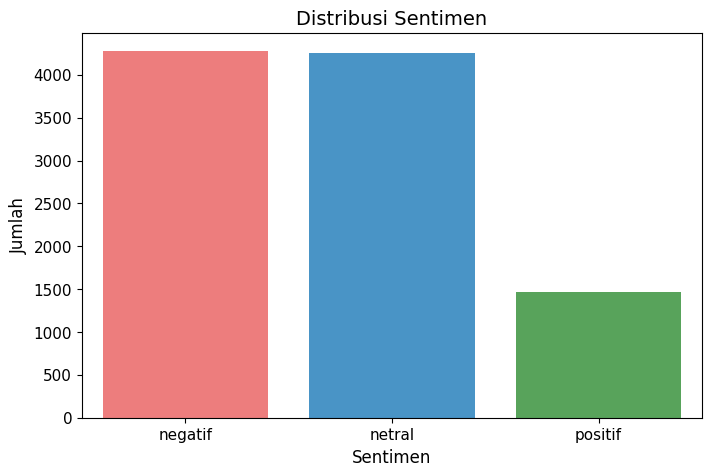

In [ ]:
# Warna khusus untuk setiap sentimen
sentiment_colors = {"negatif": "#FF6B6B", "positif": "#4CAF50", "netral": "#3498DB"}

plt.figure(figsize=(8, 5))
sns.countplot(x=df["sentiment"], palette=sentiment_colors, order=["negatif", "netral", "positif"])
plt.title("Distribusi Sentimen", fontsize=14)
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

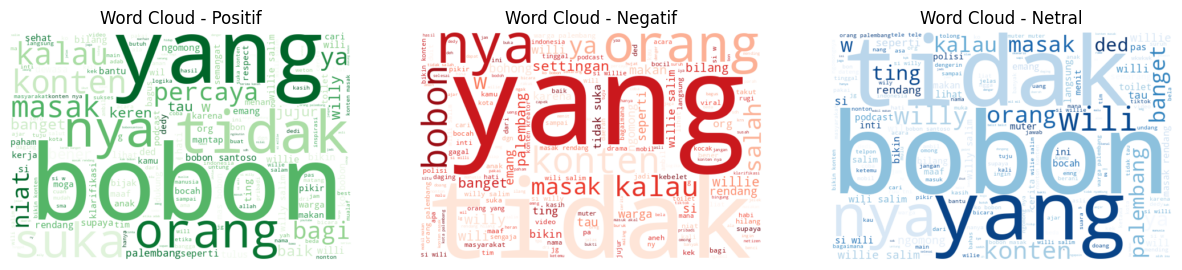

In [ ]:
# Pisahkan teks berdasarkan sentimen
text_positive = " ".join(df[df["sentiment"] == "positif"]["Cleaned_Comment"])
text_negative = " ".join(df[df["sentiment"] == "negatif"]["Cleaned_Comment"])
text_neutral = " ".join(df[df["sentiment"] == "netral"]["Cleaned_Comment"])

# Buat word cloud
wc_positive = WordCloud(width=600, height=400, background_color="white", colormap="Greens").generate(text_positive)
wc_negative = WordCloud(width=600, height=400, background_color="white", colormap="Reds").generate(text_negative)
wc_neutral = WordCloud(width=600, height=400, background_color="white", colormap="Blues").generate(text_neutral)

# Tampilkan word cloud
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.imshow(wc_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positif")

plt.subplot(1, 3, 2)
plt.imshow(wc_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Negatif")

plt.subplot(1, 3, 3)
plt.imshow(wc_neutral, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Netral")

plt.show()

[('tidak', 2567), ('yang', 2322), ('bobon', 2156), ('konten', 1788), ('nya', 1620), ('orang', 1535), ('palembang', 1257), ('salim', 1255), ('si', 1204), ('masak', 1199), ('willy', 1101), ('kalau', 1034), ('willie', 978), ('wili', 966), ('rendang', 809), ('banget', 770), ('ws', 763), ('ya', 755), ('willi', 647), ('suka', 604)]


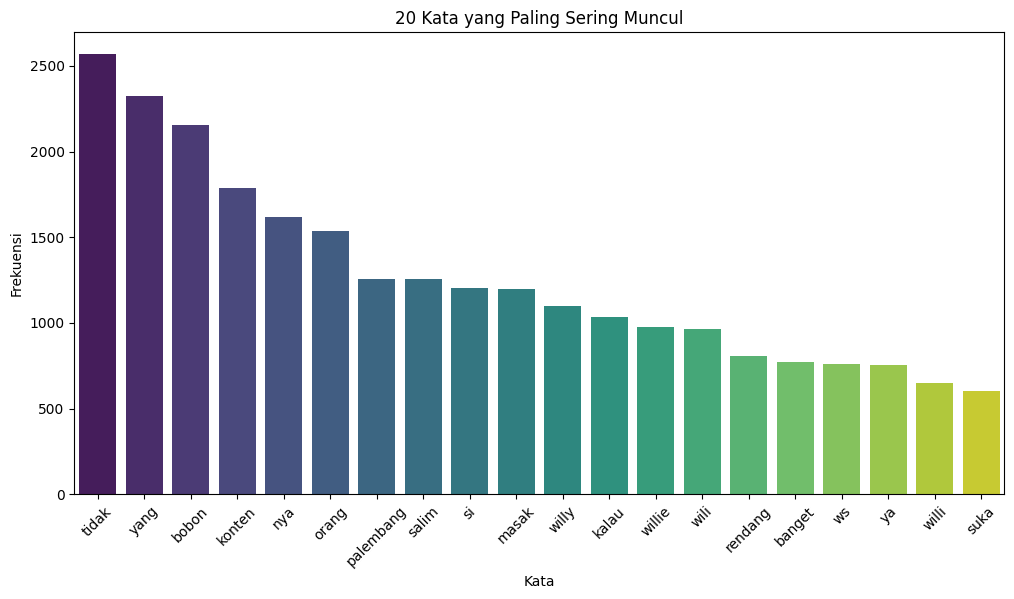

In [ ]:
# Gabungkan semua teks
all_words = " ".join(df["Cleaned_Comment"]).split()

# Hitung frekuensi kata
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)  # Ambil 20 kata paling sering

# Pisahkan kata dan jumlah kemunculannya
words, counts = zip(*common_words)


print(common_words)
# Plot frekuensi kata
plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("20 Kata yang Paling Sering Muncul")
plt.show()

In [ ]:
# Simpan hasil sentimen ke dalam csv
df.to_csv("Label_sentiment.csv", index=False, encoding="utf-8")

print("DataFrame telah diekspor ke Label_sentiment.csv")

DataFrame telah diekspor ke Label_sentiment.csv


# **Pembuatan Model**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.feature_extraction.text import TfidfVectorizer # type: ignore
from tensorflow.keras.preprocessing.text import Tokenizer # type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Embedding, LSTM, GRU, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Bidirectional, Reshape # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore
from tensorflow.keras.callbacks import Callback # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
import pickle

# Set random seed
tf.random.set_seed(42)

In [ ]:
# Load dataset
df = pd.read_csv("/content/Label_sentiment.csv")
df.dropna(inplace=True)

In [ ]:
# Encode label
label_encoder = LabelEncoder()
df["sentiment"] = label_encoder.fit_transform(df["sentiment"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["Cleaned_Comment"], df["sentiment"], test_size=0.2, stratify=df["sentiment"], random_state=42)
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Tokenization
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Apply tokenization and padding to X_train and X_test
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100, padding='post', truncating='post')
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100, padding='post', truncating='post')

In [ ]:
# Callback untuk berhenti jika akurasi mencapai 95%
class StopAtAccuracy(Callback):
    def __init__(self, target_accuracy=0.95):
        super(StopAtAccuracy, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_acc = logs.get("val_accuracy")
        if val_acc is not None and val_acc >= self.target_accuracy:
            print(f"\nStopping training as val_accuracy reached {val_acc:.4f} (≥ {self.target_accuracy})")
            self.model.stop_training = True

## **Skema 1 Bi-LSTM	Tokenizer + Embedding Layer**

In [ ]:
# Model LSTM
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(3, activation="softmax")
])

early_stop_custom = StopAtAccuracy(target_accuracy=0.95)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile Model
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=["accuracy"])

# Training Model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop_custom])

Epoch 1/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 90s 163ms/step - accuracy: 0.5697 - loss: 0.9202 - val_accuracy: 0.8541 - val_loss: 0.3790
Epoch 2/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 91s 182ms/step - accuracy: 0.9122 - loss: 0.2737 - val_accuracy: 0.9326 - val_loss: 0.2157
Epoch 3/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9757 - loss: 0.0831
Stopping training as val_accuracy reached 0.9517 (≥ 0.95)
497/497 ━━━━━━━━━━━━━━━━━━━━ 115s 129ms/step - accuracy: 0.9757 - loss: 0.0831 - val_accuracy: 0.9517 - val_loss: 0.1904


In [ ]:
# Evaluasi Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9530 - loss: 0.1831

Test Accuracy: 95.17%


## **Skema 2 GRU + TF-IDF**

In [ ]:
# Konversi X_train dan X_test menjadi list of strings jika masih berbentuk array
X_train_text = list(map(str, X_train))
X_test_text = list(map(str, X_test))

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_text).toarray()
X_test_tfidf = tfidf.transform(X_test_text).toarray()

# Model GRU dengan TF-IDF
model_gru = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
optimizer = Adam(learning_rate=0.001)

early_stop_custom = StopAtAccuracy(target_accuracy=0.95)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Kompilasi model
model_gru.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Latih model
model_gru.fit(
    X_train_tfidf, y_train,
    epochs=10, batch_size=16,
    validation_data=(X_test_tfidf, y_test),
    callbacks=[early_stop_custom]
)

Epoch 1/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.6247 - loss: 0.7892 - val_accuracy: 0.8948 - val_loss: 0.2840
Epoch 2/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9368 - loss: 0.1764 - val_accuracy: 0.9019 - val_loss: 0.2666
Epoch 3/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9862 - loss: 0.0514 - val_accuracy: 0.9044 - val_loss: 0.3080
Epoch 4/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9940 - loss: 0.0258 - val_accuracy: 0.9064 - val_loss: 0.3146
Epoch 5/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9959 - loss: 0.0165 - val_accuracy: 0.8993 - val_loss: 0.3439
Epoch 6/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9970 - loss: 0.0119 - val_accuracy: 0.9049 - val_loss: 0.3603
Epoch 7/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9975 - loss: 0.0098 - val_accuracy: 0.8973 - val_loss: 0.3872
Epoch 8/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9974 - loss: 0.0106 - 

In [ ]:
# Evaluasi Model
test_loss, test_acc = model_gru.evaluate(X_test_tfidf, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8885 - loss: 0.4938

Test Accuracy: 89.43%


### **SKEMA 3 CNN + LSTM**

In [ ]:
# Model CNN + LSTM
model_cnn_lstm_best = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=100),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Reshape((1, 64)),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Optimizer & Callbacks
optimizer = Adam(learning_rate=0.001)
early_stop_custom = StopAtAccuracy(target_accuracy=0.92)

In [ ]:
# Compile model
model_cnn_lstm_best.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

model_cnn_lstm_best.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop_custom]
)

Epoch 1/20
496/497 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6192 - loss: 0.8007
Stopping training as val_accuracy reached 0.9482 (≥ 0.92)
497/497 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.6198 - loss: 0.7997 - val_accuracy: 0.9482 - val_loss: 0.1818


In [ ]:
# Evaluasi Model
test_loss, test_acc = model_cnn_lstm_best.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9511 - loss: 0.1630

Test Accuracy: 94.82%


# **Keseluruhan Akurasi Model**

In [ ]:
# Evaluasi Model
def evaluate_model(model, X_test, y_test, name):
    loss, acc = model.evaluate(X_test, y_test)
    print(f"\n{name} Accuracy: {acc * 100:.2f}%")

# Evaluasi masing-masing model dengan input yang sesuai
evaluate_model(model, X_test, y_test, "LSTM")  # LSTM menggunakan X_test
evaluate_model(model_gru, X_test_tfidf, y_test, "GRU + TF-IDF")  # GRU pakai TF-IDF
evaluate_model(model_cnn_lstm_best, X_test, y_test, "CNN + LSTM")  # CNN + LSTM pakai X_test

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9530 - loss: 0.1831

LSTM Accuracy: 95.17%
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8885 - loss: 0.4938

GRU + TF-IDF Accuracy: 89.43%
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9511 - loss: 0.1630

CNN + LSTM Accuracy: 94.82%


# **Simpan Model dalam Format HDF5**

In [ ]:
# Simpan Model dalam Format HDF5
model.save("model_lstm.h5")
model_gru.save("model_gru.h5")
model_cnn_lstm_best.save("model_cnn_lstm.h5")

# **Simpan Tokenizer dan TF-IDF Vectorizer**

In [ ]:
# Simpan Tokenizer untuk LSTM dan CNN-LSTM
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Simpan TF-IDF Vectorizer untuk GRU
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

In [ ]:
!pipreqs "/content/drive/MyDrive/Dicoding_Sentimen_Submission" --scan-notebooks

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/Dicoding_Sentimen_Submission/requirements.txt
